# Programming Exercise 4c: Neural Network Class with MNIST dataset

In this version of the exercise 4 we will use the MNIST original dataset and not the one coming from Andrew Ng's course.
> This can be used for this competition: https://www.kaggle.com/c/digit-recognizer. 
> The dataset is available at http://yann.lecun.com/exdb/mnist/.
> You can also get data importing it from keras (look at https://www.askpython.com/python/examples/load-and-plot-mnist-dataset-in-python).

The digits have been size-normalized and centered in a fixed-sized image. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image by computing the center of mass of the pixels, and translating the image so as to position this point at the center of the 28x28 field.

I am saving the unzipped files downloaded from that website in <code>/MNIST database/</code> subfolder.

In [7]:
# Importing the needed libraries
import os
import struct
import numpy as np
import matplotlib.pyplot as plt
# Importing the needed libraries
import pandas as pd
from neuralNetworkClass import *

# tells matplotlib to embed plots within the notebook
%matplotlib inline

mnistFolder=r"..\ex3 - MultiClass Classification + NN intro\MNIST database"
trainImages = mnistFolder + '\\train-images.idx3-ubyte'
trainLabels = mnistFolder + '\\train-labels.idx1-ubyte'
testImages = mnistFolder + '\\t10k-images.idx3-ubyte'
testLabels = mnistFolder + '\\t10k-labels.idx1-ubyte'

In [8]:
# This function will open whatever labels mnist file and return the data
def load_mnist_labels(path):
    # Open the file rb means read only + binary
    with open(path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', lbpath.read(8))
        labels = np.fromfile(lbpath, dtype=np.uint8)
    return labels

# This function will open whatever images mnist file and return the data
# 
def load_mnist_images(path):
    # Open the file rb means read only + binary
    with open(path, 'rb') as imgpath:
        magic, n, rows, cols = struct.unpack('>IIII', imgpath.read(16))
        images_data = np.fromfile(imgpath, dtype=np.uint8)
        # with reshape with reorganize the array into n rows, 
        # where every row is the image data flat 
        images = np.reshape(images_data, (n, rows*cols))
    return images

In [9]:
# Load the Training data
X_train = load_mnist_images(trainImages)
y_train = load_mnist_labels(trainLabels)

In [10]:
## NN definition
input_layer_size  = np.array([784])  # 28x28 Input Images of Digits
hidden_layer = np.array([50,50, 50])   # 25 hidden units
num_labels = np.array([10])          # 10 labels, from 0 to 9 - output layer

# trying to represent the NN using an array.
# nnDef.shape[0] = number of layers
# nnDef[i] = number of neurons on layer i
nnDef = np.concatenate((input_layer_size, hidden_layer, num_labels), axis=None)

## Train the NN

In [11]:
# Initialize the NN
nn=NNClassifier(nnDef, 500, 0)

In [12]:
# Train the NN
nn.fit(X_train,y_train)
# Print theta to screen
print('Cost at theta found by optimize.minimize: {:.3f}'.format(nn.cost))

C:\Users\conrado.camacho\OneDrive\Personal Projects\Coursera - Machine Learning Andrew Ng\Python code\ex4\neuralNetworkClass.py:45: RuntimeWarning: overflow encountered in exp
  z = np.exp(-x)


Cost at theta found by optimize.minimize: 0.528


## Test the model

In [13]:
X_test = load_mnist_images(testImages)
y_test = load_mnist_labels(testLabels)

In [14]:
pred = nn.predict(X_test)
print('\nTraining Set Accuracy: {:.2f} %'.format(np.mean(pred == y_test) * 100))


Training Set Accuracy: 90.88 %


## Check the cases non predicted properly

In [15]:
Check_cases = 25

# First we identify the cases where the prediction 
# is not correct - misclassified 
misclX = X_test[pred != y_test]
correct_label = y_test[pred != y_test]
miscl_label = pred[pred !=y_test]

miscl_m = miscl_label.size

# We get a testCases random datapoints. First we get a number of testCases indices out of m
rand_indices = np.random.choice(miscl_m, Check_cases, replace=False)

sel_misclX = misclX[rand_indices, :]
sel_correct_label = correct_label[rand_indices]
sel_miscl_label = miscl_label[rand_indices]

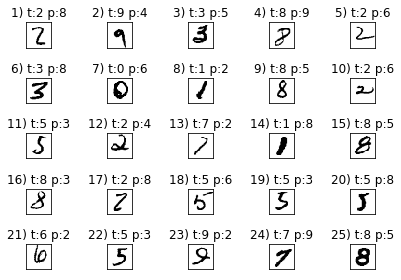

In [16]:
fig, ax = plt.subplots(nrows = 5, ncols = 5, sharex = True, sharey = True)
ax = ax.flatten()
for i in range(Check_cases):
    img = sel_misclX[i].reshape(28,28)
    ax[i].imshow(img, cmap = 'Greys', interpolation = 'nearest')
    ax[i].set_title('%d) t:%d p:%d' % (i+1,sel_correct_label[i], sel_miscl_label[i]))
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()